# Data Pre-processing
This notebook contains :

1- **Data Visualization**

2- **Data Analysis**

3- **Tweets Cleaning**

4- **Label Encoding**

5- **Features Extraction**

<hr style="border:2px solid black"> </hr>

Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from sklearn import preprocessing
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

In [2]:
tweets_dialect_df = pd.read_csv('tweets_dialect_dataset.csv')

In [3]:
tweets_dialect_df['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

Text(0.5, 1.0, 'Number of tweets per dialect')

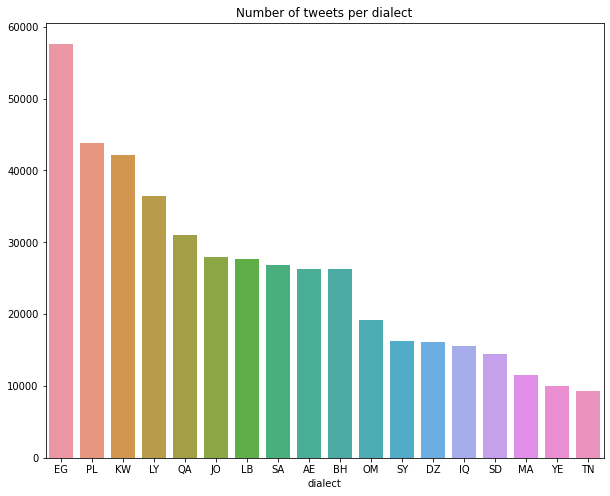

In [4]:
plt.figure(figsize=(10,8))
sns.barplot(x = tweets_dialect_df['dialect'].value_counts().index ,y =tweets_dialect_df['dialect'].value_counts().values)
plt.xlabel('dialect')
plt.title('Number of tweets per dialect')

As seen in the figure, The data is imbalanced

In general, 2 techniques can be used in imbalncde data

1- undersampling the classes with the highes number of tweets ... "not preferable for me to lose data"

2- oversampling the classes with the lowest number of tweets .. " will be a good solution but while extracting features the data will be pretty huge "

So I decided to leave it as it is, then I will use f1-score accuracy metrics

In [5]:
(tweets_dialect_df.isna()).sum()

tweet      0
dialect    0
dtype: int64

In [6]:
tweets_dialect_df.head(20)

,tweet,dialect
0,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,@KanaanRema مبين من كلامه خليجي,IQ
3,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ
5,@Badi9595 @KanaanRema يااخي الإرهابي اذا كان ع...,IQ
6,@SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم است...,IQ
7,@KanaanRema @Badi9595 خلص والله لعيونكم انا ما...,IQ
8,@SalahAlarbawi يمكن سؤال فات الكثير اللي يصور ...,IQ
9,@Eng_alow91 @cb4LwpWrS1hT5lb @EdyCohen اولا ان...,IQ


**tweet Cleaning**

Removing Emojis and symobles from tweets

In [7]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        u"\u2069" 
        u"\u2066"
        u"\u200b"
                      "]+", re.UNICODE)

def regex_manupilation(tweet):
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = re.sub(r'[0-9]+', '', tweet) # delete numbers
    tweet = re.sub(r'&amp;|&quot;|&gt;', '', tweet) # delete html components
    #tweet =re.sub(r'(.)\1+', r'\1', tweet)
    tweet = re.sub(r'\s*[A-Za-z]+\b', '' , tweet) # delete english words 
    tweet = emoji_pattern.sub('', tweet)  #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet

In [8]:
regex_manupilation('كيرو_# &amp; Hi from 🌷😂 9121 https://fb.com   @KeroML   #ماشيين_ليرننج ')

'كيرو          ماشيين ليرننج '

Removing Punctuations..

In [9]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation

def remove_punctuation(tweet):
    punctuations = arabic_punctuations + english_punctuations
    translator = str.maketrans('', '', punctuations)
    return tweet.translate(translator)

In [10]:
remove_punctuation('بانكتويشين .......؟!')

'بانكتويشين '

unifing thd multiple arabic letters representation into one standart letter for each

In [11]:
noise = re.compile(""" ّ| َ| ً| ُ| ٌ| ِ| ٍ| ْ| """, re.VERBOSE)

def unify_letters(tweet):
    tweet = re.sub("[إأٱآا]", "ا", tweet)
    tweet = re.sub("ى", "ي", tweet)
    tweet = re.sub("ؤ", "ء", tweet)
    tweet = re.sub("وو", "و", tweet)
    tweet = re.sub("ئ", "ء", tweet)
    tweet = re.sub("گ", "ك", tweet)

    tweet = re.sub(noise, '', tweet)
    return tweet

In [12]:
unify_letters("إِنَّ گگ الْقُرَّاْءَ يَقْرَؤُوْنَ الْقُرْآنَ قِرَاْءَةً جَمِيْلَــــــةً")

'ان كك القراء يقرءون القران قراءة جميلــــــة'

Remove Arabic stop words

In [13]:
stopwords_list = stopwords.words('arabic')
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [14]:
list_to_remove = ['هلا', 'دونك', 'يناير','فبراير','مارس','أبريل','مايو','يونيو','يوليو','أغسطس','سبتمبر','أكتوبر','نوفمبر','ديسمبر','جانفي','فيفري','مارس','أفريل','ماي','جوان','جويلية','أوت','كانون','شباط','آذار','نيسان','أيار','حزيران','تموز','آب','أيلول','تشرين','دولار','دينار','ريال','درهم','ليرة','جنيه','قرش','مليم','فلس','هللة','سنتيم','يورو','ين','يوان','شيكل','نيف'] 

In [15]:
stopwords_list = list(set(stopwords_list) - set(list_to_remove))


Exclude the words that may be frequently used in specific countries like **دونك** that is usally used in Algeria

In [47]:
stopwords_list_space =[]

for w in stopwords_list :
    stopwords_list_space.append(unify_letters(w))
    
stopwords_list_space = stopwords_list_space+[" "]


Final Step is to remove extra spaces and words that consist of one letter

In [17]:
def remove_stopWords_spaces(tweet):
    tweets_tokeinzed = [] 
    for w in nltk.word_tokenize(tweet) :
         if (w not in stopwords_list_space) and len(w)>1 :
                tweets_tokeinzed.append(w)
                

    return tweets_tokeinzed, ' '.join(tweets_tokeinzed)

In [18]:
remove_stopWords_spaces('هل انا نحن هو هم  و      ستوب      وورد ')

(['ستوب', 'وورد'], 'ستوب وورد')

In [19]:
def Pre_Process(tweets):    
    clean_tweets_tokenized = [] 
    clean_tweets_untokenized = [] 

    for tweet in tweets:
        tweet= regex_manupilation(tweet)
        tweet= remove_punctuation(tweet)
        tweet = unify_letters(tweet)
        tweet_tokized ,tweet_untokized = remove_stopWords_spaces(tweet)
        clean_tweets_tokenized.append(tweet_tokized)
        clean_tweets_untokenized.append(tweet_untokized)
    return clean_tweets_tokenized,clean_tweets_untokenized # save to versions of tweets, tokenized one and String one

In [20]:
clean_df = tweets_dialect_df
clean_df['clean_tweet_tokenized'], clean_df['clean_tweet_untokenized']= Pre_Process(tweets_dialect_df['tweet'])


Check if there ara empty tweets after preprocessing

In [21]:
indicies =clean_df[clean_df['clean_tweet_untokenized'] == ''].index
len(indicies)

242

In [22]:
clean_df= clean_df.drop(clean_df.index[indicies])

In [23]:
del tweets_dialect_df

In [24]:
clean_df['clean_tweet_untokenized'].to_csv('clean_tweet_untokenized.csv' , index = False) # Save the string version of clean tweets.


In [25]:
clean_df.drop(labels=['clean_tweet_untokenized'] ,axis =1, inplace = True)

In [ ]:
'''#Over Sampling
from imblearn.over_sampling import RandomOverSampler

y=clean_df['dialect'] 
X= clean_df.drop(['dialect'], axis=1)

ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)
clean_df=pd.concat([X_res, y_res] ,axis=1)

del X_res, y_res , X,y
plt.figure(figsize=(10,8))
sns.barplot(x = clean_df['dialect'].value_counts().index ,y =clean_df['dialect'].value_counts().values)
plt.xlabel('dialect')
plt.title('Number of tweets per dialect After Over Sampling')

Visualize the top *N* frequent words in *X* dialect

In [26]:
def top_n_word(dialect,n): 
    words = [word for tokens in clean_df[clean_df['dialect']== dialect]['clean_tweet_tokenized'] for word in tokens]
    counter = Counter(words)
    indicies =[] 
    counts =[]
    words = []
    for  i in counter.most_common(n):
        words.append(i[0])
        indicies.append(i[0][::-1])
        counts.append(i[1])
    plt.figure(figsize=(10,8))
    
    sns.barplot(x = indicies ,y =counts)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('Top '+str(n)+' frequent words in ' +dialect )
    
    return words

['اللي',
 'مش',
 'ده',
 'دي',
 'مصر',
 'عشان',
 'الله',
 'ربنا',
 'احنا',
 'كده',
 'حد',
 'الناس',
 'بقي',
 'زي',
 'والله']

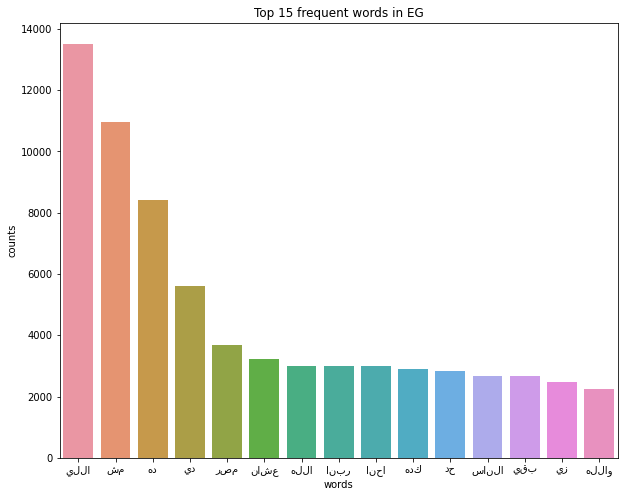

In [27]:
top_n_word('EG' , 15)

['مو', 'اللي', 'الله', 'والله', 'شنو', 'هاي', 'شي', 'ليش', 'يعني', 'لان']

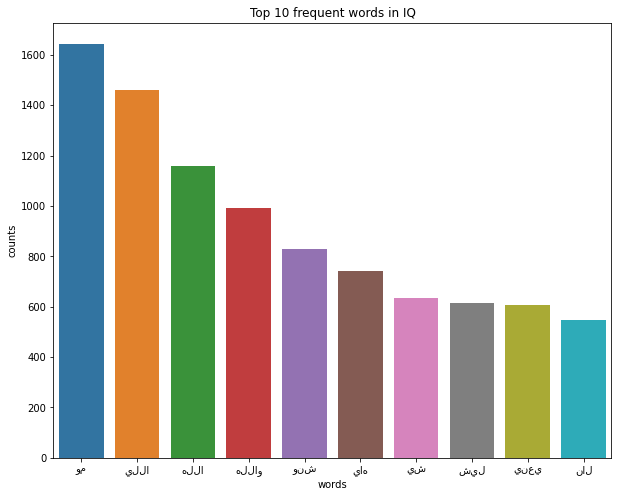

In [28]:
top_n_word('IQ',10)

['اللي', 'الله', 'مو', 'شي', 'والله', 'الكويت', 'شنو', 'ليش', 'الناس', 'يعني']

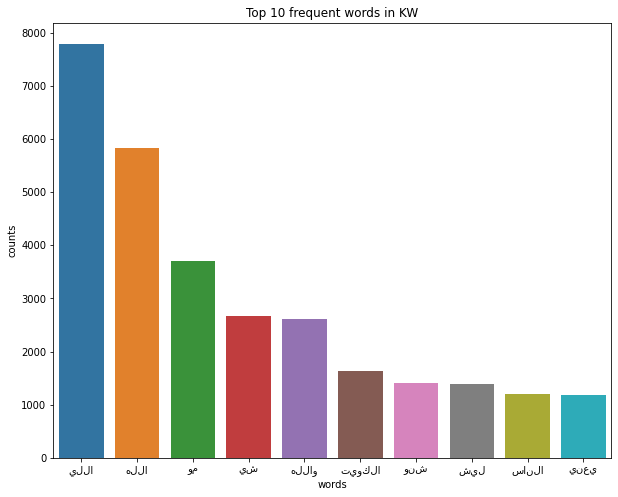

In [48]:
top_n_word('KW',10)

['الله', 'اللي', 'مش', 'والله', 'شو', 'هيك', 'عشان', 'رح', 'اشي', 'يعني']

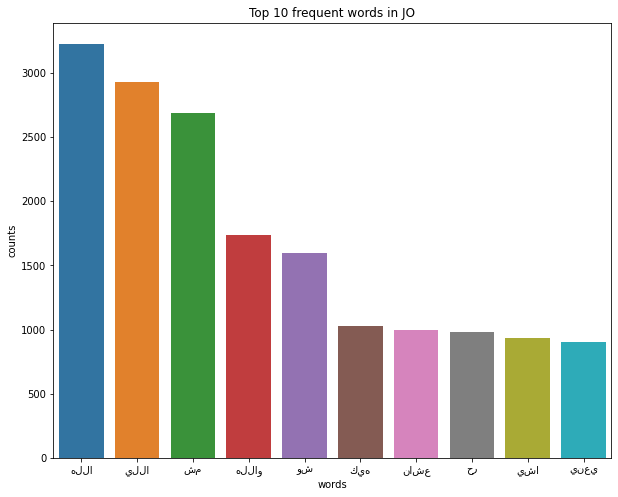

In [49]:
top_n_word('JO',10)

Analyzing the figures above, we can deduce that **Many words are common between Arabic dialects**

**Encoding Target Labels**

Using Label encoder not one hot encoder to be easly fit in The ML Model

In [29]:
label_encoder = preprocessing.LabelEncoder()

In [30]:
clean_df['dialect_encoded'] = label_encoder.fit_transform(clean_df['dialect'])

In [31]:
clean_df.head()

,tweet,dialect,clean_tweet_tokenized,dialect_encoded
0,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ,"[بالنهاية, ينتفض, يغير]",4
1,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ,"[يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال...",4
2,@KanaanRema مبين من كلامه خليجي,IQ,"[مبين, كلامه, خليجي]",4
3,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ,"[يسلملي, مرورك, وروحك, الحلوه]",4
4,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ,"[وين, الغيبه, محمد]",4


In [32]:
label_encoder.classes_

array(['AE', 'BH', 'DZ', 'EG', 'IQ', 'JO', 'KW', 'LB', 'LY', 'MA', 'OM',
       'PL', 'QA', 'SA', 'SD', 'SY', 'TN', 'YE'], dtype=object)

In [33]:
clean_df['dialect_encoded'].unique()

array([ 4,  8, 12, 11, 15, 16,  5,  9, 13, 17,  2,  3,  7,  6, 10, 14,  0,
        1])

**Extracting Features**

using TFIDF, I extract 2000 *(1-3)* words as features for the whole dataset

In [34]:
word2vec= TfidfVectorizer(
    min_df=0.0001, 
    max_df=0.95, 
    ngram_range=(1, 3),
    max_features= 2000,
    analyzer='word')

In [35]:
TrigramdataGet= word2vec.fit_transform(clean_df['clean_tweet_tokenized'].astype('str')).toarray()

In [36]:
features=pd.DataFrame(np.round(TrigramdataGet, 1), columns=word2vec.get_feature_names())

C:\Users\RC\.conda\envs\Digisay\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
features.columns[0:100]

Index(['ابد', 'ابراهيم', 'ابرك', 'ابن', 'ابوك', 'ابوه', 'ابوي', 'ابي', 'ابيض',
       'اتفق', 'اتكلم', 'اتمني', 'اتنين', 'اتوقع', 'اجازة', 'اجمل', 'اجي',
       'احب', 'احبك', 'احبه', 'احترام', 'احترامي', 'احس', 'احساس', 'احسن',
       'احكي', 'احلا', 'احلام', 'احلي', 'احمد', 'احمر', 'احنا', 'احيانا',
       'اخاف', 'اخبار', 'اخت', 'اختي', 'اخد', 'اخر', 'اخري', 'اخلاق', 'اخوان',
       'اخوك', 'اخوي', 'اخي', 'ادارة', 'ادب', 'ادخل', 'ادري', 'ادم', 'ادور',
       'ارجع', 'ارد', 'ارض', 'اروح', 'ازا', 'ازاي', 'اساس', 'اساسا', 'اسال',
       'اسبوع', 'استاذ', 'استغفر', 'استغفر الله', 'اسراءيل', 'اسف', 'اسلوب',
       'اسم', 'اسمع', 'اسمك', 'اسمه', 'اسمها', 'اسمي', 'اسود', 'اسوي', 'اسيا',
       'اش', 'اشتري', 'اشتغل', 'اشخاص', 'اشرف', 'اشلون', 'اشوف', 'اشوفك',
       'اشوفه', 'اشي', 'اشياء', 'اصحاب', 'اصحي', 'اصعب', 'اصل', 'اضحك',
       'اطفال', 'اطلع', 'اظن', 'اعتقد', 'اعرف', 'اعرفه', 'اعلي', 'اعمل'],
      dtype='object')

In [38]:
features.shape

(457955, 2000)

In [39]:
features.to_csv('features.csv',index=False)


In [40]:
del features

In [37]:
clean_df['dialect_encoded'].to_csv('dialects.csv',index=False)

**Arabert** could have a greet benefit to extract features from tweets.

Howevere, It could have more than 15 hours to process the df. 

So I decided to go without Arabert


In [123]:
'''
from transformers import TFAutoModel
from transformers import AutoTokenizer
model_name= 'aubmindlab/bert-base-arabertv02'  
model=TFAutoModel.from_pretrained(model_name)
tokenizer =AutoTokenizer.from_pretrained(model_name) 
example = 'هاي هالو'
tokenizer.tokenize(example)
inputs = tokenizer.encode_plus(example ,return_tensors='tf')
inputs
outputs = model(inputs['input_ids'],inputs['attention_mask'],inputs['token_type_ids'])
outputs[0]


['هاي', 'هال', '##و']

Using Pickle to save the label encoder

In [35]:
import pickle

with open("1st_encoder", "wb") as f: 
    pickle.dump(label_encoder, f)
    



In [42]:
with open("1st_encoder", "rb") as f: 
    label_encoder_trial = pickle.load(f) 